# **1. Load the Dataset && Inspect the Data**

In [ ]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "IMDB Dataset.csv"))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **2. Handle Missing Values**

In [ ]:
df.dropna(inplace=True)

# **3. Select Relevant Columns**

In [ ]:
df = df[['review', 'sentiment']]

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  object
 2   cleaned_text  50000 non-null  object
 3   label         50000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


,review,sentiment,cleaned_text,label
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1


# **4. Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
df['cleaned_text'] = df['review'].apply(preprocess_text)

# **5. Label Encoding**

In [ ]:
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
df.head()

,review,sentiment,cleaned_text,label
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1


# **6. Text Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# **7. Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **8. Model Training**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **9. Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8883
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# **Bouns(Visualization):**

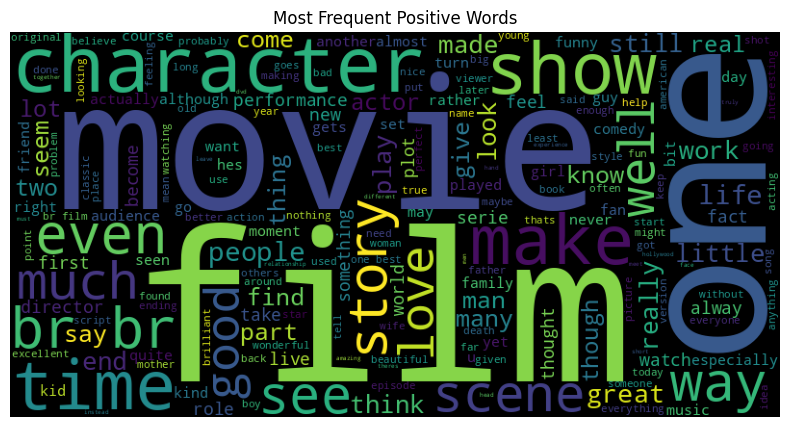

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['label']==1]['cleaned_text'])
negative_text = ' '.join(df[df['label']==0]['cleaned_text'])

plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400).generate(positive_text))
plt.title("Most Frequent Positive Words")
plt.axis('off')
plt.show()

# **Upload and Share**

In [ ]:
import joblib
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']